In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_cricket = pd.read_csv("Cricket.csv")
df_cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar�(INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara�(Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting�(AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya�(Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene�(Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [3]:
df_cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [4]:
df_cricket[['Player']] = df_cricket[['Player']].astype('string')

In [5]:
df_cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     string 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(2), string(1)
memory usage: 8.1+ KB


In [6]:
x='SR Tendulkar�(INDIA)'
print(x[0:x.index('�')])

SR Tendulkar


In [7]:
df_cricket['Player'] = df_cricket['Player'].apply(lambda x:x[0:x.index('�')])

In [8]:
df_cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [9]:
df_high_score = df_cricket[['Player','Ave','SR']]
df_high_score.head()

,Player,Ave,SR
0,SR Tendulkar,44.83,86.23
1,KC Sangakkara,41.98,78.86
2,RT Ponting,42.03,80.39
3,ST Jayasuriya,32.36,91.20
4,DPMD Jayawardene,33.37,78.96


In [10]:
df_high_score.describe()

,Ave,SR
count,79.000000,79.000000
mean,38.523291,79.295316
std,5.919093,9.925307
min,23.570000,60.570000
25%,34.600000,73.725000
50%,37.870000,77.730000
75%,41.845000,85.180000
max,53.940000,117.000000


In [11]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
np_scaler = scaler.fit_transform(df_high_score[['Ave','SR']])

In [13]:
df_scaled_cricket = pd.DataFrame(np_scaler)
df_scaled_cricket.columns = ['Ave','SR']
df_scaled_cricket.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [14]:
df_scaled_cricket.describe()

,Ave,SR
count,7.900000e+01,7.900000e+01
mean,4.497106e-17,7.908582e-16
std,1.006390e+00,1.006390e+00
min,-2.542423e+00,-1.898679e+00
25%,-6.670549e-01,-5.648097e-01
50%,-1.110754e-01,-1.587174e-01
75%,5.647713e-01,5.966854e-01
max,2.621216e+00,3.823117e+00


In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=4, max_iter=100, random_state=100)
kmeans.fit(df_scaled_cricket)

KMeans(max_iter=100, n_clusters=4, random_state=100)

In [17]:
df_high_score['cluster_id'] = kmeans.labels_
df_high_score.head()

,Player,Ave,SR,cluster_id
0,SR Tendulkar,44.83,86.23,3
1,KC Sangakkara,41.98,78.86,1
2,RT Ponting,42.03,80.39,1
3,ST Jayasuriya,32.36,91.20,0
4,DPMD Jayawardene,33.37,78.96,2


In [18]:
df_high_score[df_high_score['Player'].str.contains('Guptill')]

,Player,Ave,SR,cluster_id
63,MJ Guptill,43.3,87.73,3


In [19]:
df_high_score[df_high_score['cluster_id']==3]

,Player,Ave,SR,cluster_id
0,SR Tendulkar,44.83,86.23,3
13,MS Dhoni,51.32,88.69,3
15,AB de Villiers,53.55,100.25,3
25,V Kohli,53.94,90.99,3
34,HM Amla,50.25,89.05,3
38,MG Bevan,53.58,74.16,3
42,IVA Richards,47.00,90.20,3
63,MJ Guptill,43.30,87.73,3
64,MEK Hussey,48.15,87.16,3


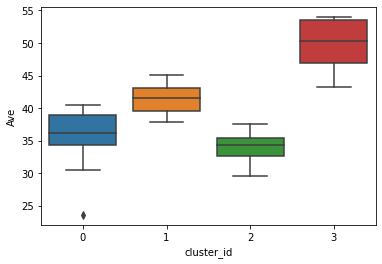

In [20]:
sns.boxplot(x='cluster_id',y='Ave',data=df_high_score)
plt.show()

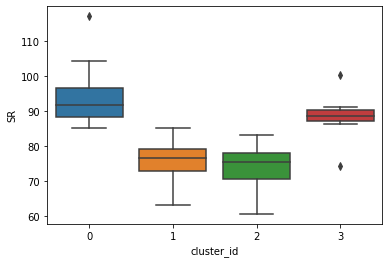

In [21]:
sns.boxplot(x='cluster_id',y='SR',data=df_high_score)
plt.show()

In [25]:
import scipy.cluster.hierarchy

In [26]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [27]:
df_scaled_cricket.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


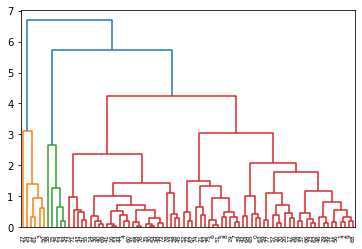

In [28]:
mergings = linkage(df_scaled_cricket, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [29]:
cluster_labels = cut_tree(mergings, n_clusters=4)
cluster_labels

array([[0],
       [0],
       [0],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [3],
       [2],
       [3],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [3],
       [0],
       [1],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [3],
       [2],
       [2],
       [0],
       [3],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [1],
       [0],
       [0],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [0],
       [2],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [0],
       [2]])

In [30]:
type(cluster_labels)

numpy.ndarray

In [31]:
cluster_labels.shape

(79, 1)

In [34]:
cluster_labels = cluster_labels.reshape(-1,)

In [35]:
cluster_labels.shape

(79,)

In [36]:
df_high_score.head()

,Player,Ave,SR,cluster_id
0,SR Tendulkar,44.83,86.23,3
1,KC Sangakkara,41.98,78.86,1
2,RT Ponting,42.03,80.39,1
3,ST Jayasuriya,32.36,91.20,0
4,DPMD Jayawardene,33.37,78.96,2


In [37]:
df_high_score['cluster_h_id'] = cluster_labels

In [38]:
df_high_score.head()

,Player,Ave,SR,cluster_id,cluster_h_id
0,SR Tendulkar,44.83,86.23,3,0
1,KC Sangakkara,41.98,78.86,1,0
2,RT Ponting,42.03,80.39,1,0
3,ST Jayasuriya,32.36,91.20,0,1
4,DPMD Jayawardene,33.37,78.96,2,2


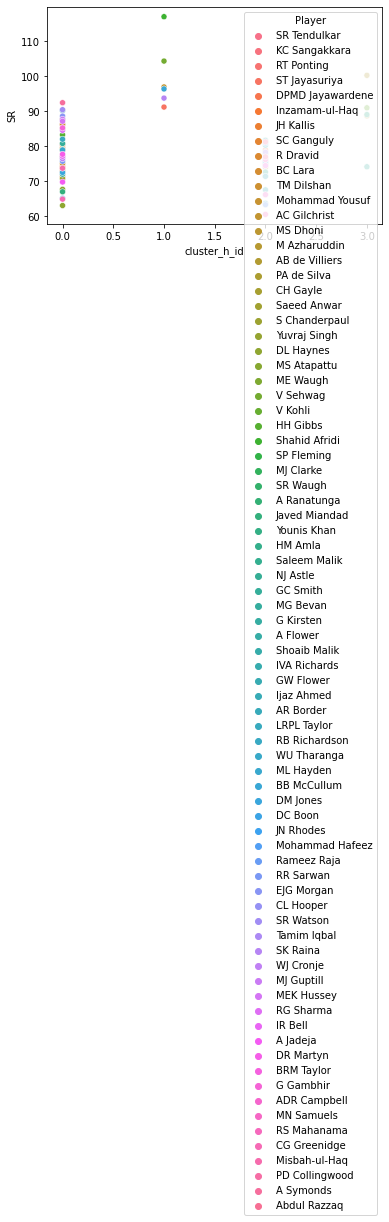

In [40]:
sns.scatterplot(x='cluster_h_id',y='SR',hue='Player',data=df_high_score)
plt.show()

In [48]:
df_high_score[df_high_score['Player'].str.contains('Ganguly')]

,Player,Ave,SR,cluster_id,cluster_h_id
7,SC Ganguly,41.02,73.7,1,0


In [52]:
kmeans = KMeans(n_clusters=4, max_iter=100, random_state=100)
kmeans.fit_predict(df_scaled_cricket)

array([3, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 3, 2, 3, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 3, 2, 0, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3, 2,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 3, 3, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2], dtype=int32)

In [53]:
df_high_score['cluster_k_id'] = kmeans.labels_

In [54]:
df_high_score.head()

,Player,Ave,SR,cluster_id,cluster_h_id,cluster_k_id
0,SR Tendulkar,44.83,86.23,3,0,3
1,KC Sangakkara,41.98,78.86,1,0,1
2,RT Ponting,42.03,80.39,1,0,1
3,ST Jayasuriya,32.36,91.20,0,1,0
4,DPMD Jayawardene,33.37,78.96,2,2,2


In [58]:
filtered_cluster_0 = df_high_score.loc[df_high_score['cluster_k_id']==0,['Player','Ave','SR']]
filtered_cluster_0.head()

,Player,Ave,SR
3,ST Jayasuriya,32.36,91.20
10,TM Dilshan,39.27,86.23
12,AC Gilchrist,35.89,96.94
17,CH Gayle,37.33,85.11
20,Yuvraj Singh,36.55,87.67


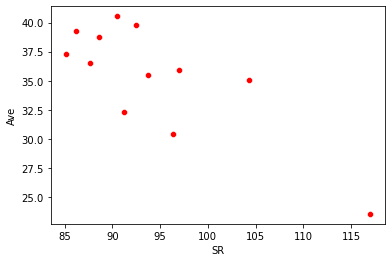

In [64]:
sns.scatterplot(x='SR', y='Ave',data=filtered_cluster_0, color='red')
plt.show()

In [65]:
filtered_cluster_1 = df_high_score.loc[df_high_score['cluster_k_id']==1,['Player','Ave','SR']]
filtered_cluster_1.head()

,Player,Ave,SR
1,KC Sangakkara,41.98,78.86
2,RT Ponting,42.03,80.39
5,Inzamam-ul-Haq,39.52,74.24
6,JH Kallis,44.36,72.89
7,SC Ganguly,41.02,73.70


In [66]:
filtered_cluster_2 = df_high_score.loc[df_high_score['cluster_k_id']==2,['Player','Ave','SR']]
filtered_cluster_2.head()

,Player,Ave,SR
4,DPMD Jayawardene,33.37,78.96
14,M Azharuddin,36.92,74.02
16,PA de Silva,34.90,81.13
22,MS Atapattu,37.57,67.72
26,HH Gibbs,36.13,83.26


In [67]:
filtered_cluster_3 = df_high_score.loc[df_high_score['cluster_k_id']==3,['Player','Ave','SR']]
filtered_cluster_3.head()

,Player,Ave,SR
0,SR Tendulkar,44.83,86.23
13,MS Dhoni,51.32,88.69
15,AB de Villiers,53.55,100.25
25,V Kohli,53.94,90.99
34,HM Amla,50.25,89.05


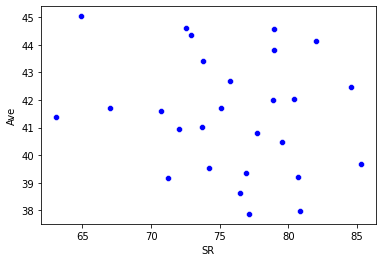

In [68]:
sns.scatterplot(x='SR', y='Ave',data=filtered_cluster_1, color='blue')
plt.show()

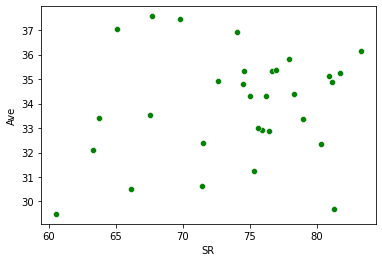

In [69]:
sns.scatterplot(x='SR', y='Ave',data=filtered_cluster_2, color='green')
plt.show()

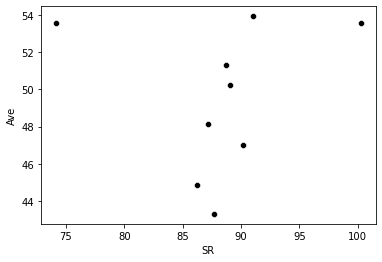

In [70]:
sns.scatterplot(x='SR', y='Ave',data=filtered_cluster_3, color='black')
plt.show()

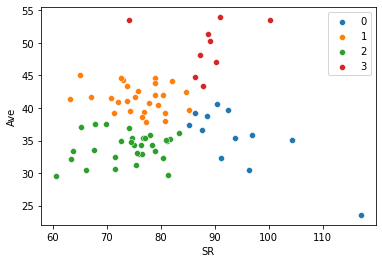

In [72]:
#Getting unique labels
 
u_labels = np.unique(df_high_score.cluster_k_id)
 
#plotting the results:
 
for i in u_labels:
    sns.scatterplot(x='SR', y='Ave',data=df_high_score[df_high_score['cluster_k_id']==i], label=i)
    #plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()